In [11]:
# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Utility
import re
import numpy as np
import os
import pandas as pd

# Tools
from textblob import TextBlob
from wordcloud import WordCloud

In [12]:
df = pd.read_csv('./Sentiment140.csv', encoding='latin-1')
print(df.head(10))

   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
5  0  1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY          mybirch   
6  0  1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY             coZZ   
7  0  1467811795  Mon Apr 06 22:20:05 PDT 2009  NO_QUERY  2Hood4Hollywood   
8  0  1467812025  Mon Apr 06 22:20:09 PDT 2009  NO_QUERY          mimismo   
9  0  1467812416  Mon Apr 06 22:20:16 PDT 2009  NO_QUERY   erinx3leannexo   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samarth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
df.columns = ['sentiment', 'id', 'timestamp', 'query', 'username', "tweet"]
df.head(5)

,sentiment,id,timestamp,query,username,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [15]:
print('Number of positive and negative reviews: ', df.sentiment.value_counts())
print('Proportion of positive and negative reviews: ', df.sentiment.value_counts() / len(df))

Number of positive and negative reviews:  4    800000
0    799999
Name: sentiment, dtype: int64
Proportion of positive and negative reviews:  4    0.5
0    0.5
Name: sentiment, dtype: float64


In [16]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
    %%time
df['tweet'] = df['tweet'].apply(lambda x: preprocess(x))

In [17]:
df['tweet'] = df['tweet'].str.lower()
df.head(10)

,sentiment,id,timestamp,query,username,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting might cry result...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving mad see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,hey long time see yes rains bit bit lol fine t...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,nope
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,que muera
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break plain city snowing


In [18]:
# Create a function to get subjectivity
#Subjectivity tells how subjective/opinionated the text is
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get Polarity 
#Polarity tells how much positive/negative the text is
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns 
df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

# Show the new Dataframe with 2 new columns
df

,sentiment,id,timestamp,query,username,tweet,Subjectivity,Polarity
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,0.000,0.000
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,0.500,0.500
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.400,0.200
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving mad see,1.000,-0.625
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew,0.400,0.200
...,...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,woke school best feeling ever,0.300,1.000
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb com cool hear old walt interviews,0.425,0.225
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready mojo makeover ask details,0.500,0.200
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday boo alll time tupac amaru ...,1.000,0.800


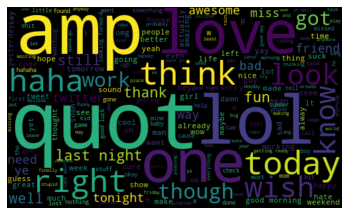

In [19]:
# Plot the Word Cloud
# To see how well these sentiments are distributed
# Visualization where the more specific word appears in the text, the bigger and bolder it appears in Word Cloud
allWords = ' '.join( [tweets for tweets in df['tweet']] )
wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [20]:
def getAnalysis(score):
  if score< 0:
    return 0
  elif score==0:
    return 2
  else:
    return 4
df['Analysis']=df['Polarity'].apply(getAnalysis)
#print df with analysis column
df.head()

,sentiment,id,timestamp,query,username,tweet,Subjectivity,Polarity,Analysis
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,0.0,0.000,2
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,0.5,0.500,4
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.4,0.200,4
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving mad see,1.0,-0.625,0
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew,0.4,0.200,4


In [21]:
# #printing all the positive tweets
# j=1
# sortedDF=df.sort_values(by=['Polarity'])
# for i in range(0, sortedDF.shape[0]):
#   if(sortedDF['Analysis'][i]=='Positive'):
#     print(str(j)+')'+sortedDF['tweet'][i])
#     print()
#     j=j+1

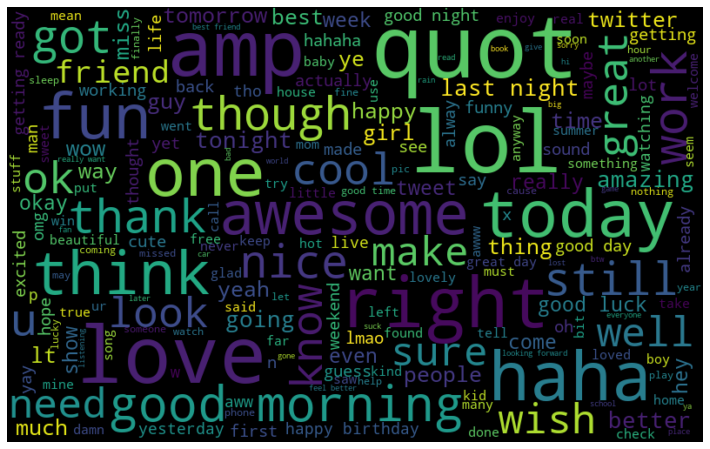

In [22]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['tweet'][df['Analysis']==4]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
#printing all the positive tweets
# j=1
# sortedDF=df.sort_values(by=['Polarity'],ascending='False')
# for i in range(0, sortedDF.shape[0]):
#   if(sortedDF['Analysis'][i]=='Negative'):
#     print(str(j)+')')+sortedDF['Tweets'][i])
#     print()
#     j=j+1

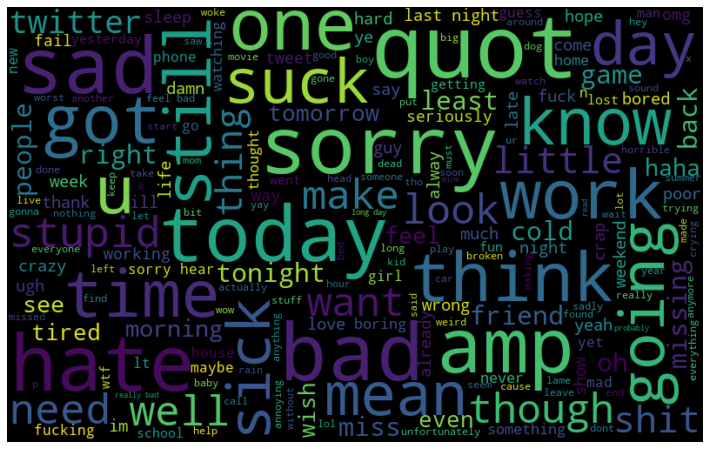

In [24]:
all_words = " ".join([sentence for sentence in df['tweet'][df['Analysis']== 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', df.Analysis.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', df.Analysis.value_counts() / len(df))